<a href="https://colab.research.google.com/github/elemnurguner/data-ai-projects/blob/main/kalphastal%C4%B1%C4%9F%C4%B1tahminmodeli_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [6]:
import pandas as pd

# Doğrudan çalışan veri seti bağlantısı
url = "https://raw.githubusercontent.com/kb22/Heart-Disease-Prediction/master/dataset.csv"
df = pd.read_csv(url)

# İlk 5 satırı görüntüleyelim
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
# Veri tipi ve eksik değer kontrolü
df.info()

# Veri setindeki sınıfların dağılımına bakalım
df['target'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,count
target,
1,165
0,138


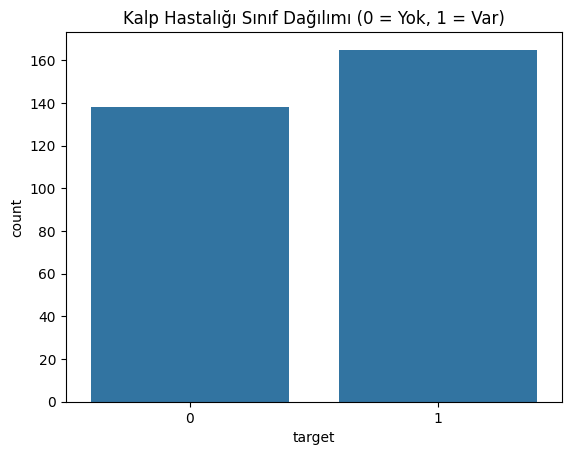

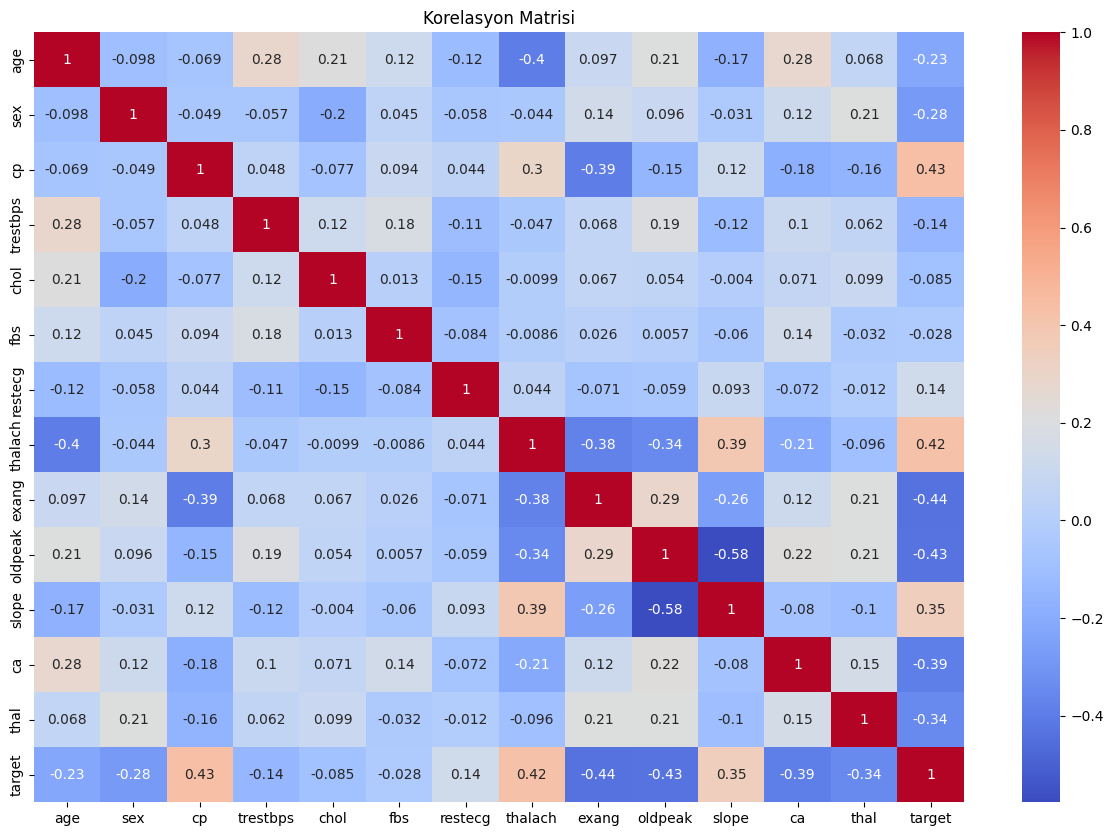

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Hedef değişkenin dağılımı
sns.countplot(x='target', data=df)
plt.title("Kalp Hastalığı Sınıf Dağılımı (0 = Yok, 1 = Var)")
plt.show()

# Korelasyon haritası
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Korelasyon Matrisi")
plt.show()


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Özellik ve hedef değişken
X = df.drop('target', axis=1)
y = df['target']

# Eğitim/test ayrımı
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ölçekleme (Scaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Model oluşturma ve eğitme
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Tahmin
y_pred = model.predict(X_test_scaled)

# Sonuçlar
print("Doğruluk Oranı:", accuracy_score(y_test, y_pred))
print("\nSınıflandırma Raporu:\n", classification_report(y_test, y_pred))
print("\nKarmaşıklık Matrisi:\n", confusion_matrix(y_test, y_pred))


Doğruluk Oranı: 0.8524590163934426

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61


Karmaşıklık Matrisi:
 [[25  4]
 [ 5 27]]


🎯 5.1 ROC Eğrisi (Logistic Regression için)
python
Kopyala
Düzenle


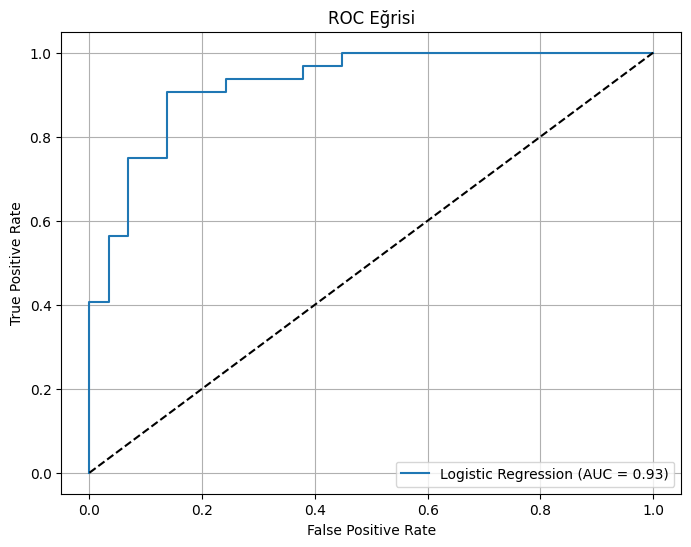

In [11]:
from sklearn.metrics import roc_curve, roc_auc_score

# Olasılık tahminleri
y_probs = model.predict_proba(X_test_scaled)[:, 1]

# ROC eğrisi
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Eğrisi')
plt.legend()
plt.grid(True)
plt.show()


🧠 Model Karşılaştırması



In [13]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

models = {
    "SVM": SVC(probability=True, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}


In [14]:
for name, clf in models.items():
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    y_proba = clf.predict_proba(X_test_scaled)[:,1]

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    print(f"📌 {name}")
    print(f"  ✅ Doğruluk: {acc:.2f}")
    print(f"  🔥 AUC: {auc:.2f}")
    print("-" * 30)


📌 SVM
  ✅ Doğruluk: 0.87
  🔥 AUC: 0.93
------------------------------
📌 Random Forest
  ✅ Doğruluk: 0.84
  🔥 AUC: 0.92
------------------------------
📌 XGBoost
  ✅ Doğruluk: 0.82
  🔥 AUC: 0.91
------------------------------


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:29:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


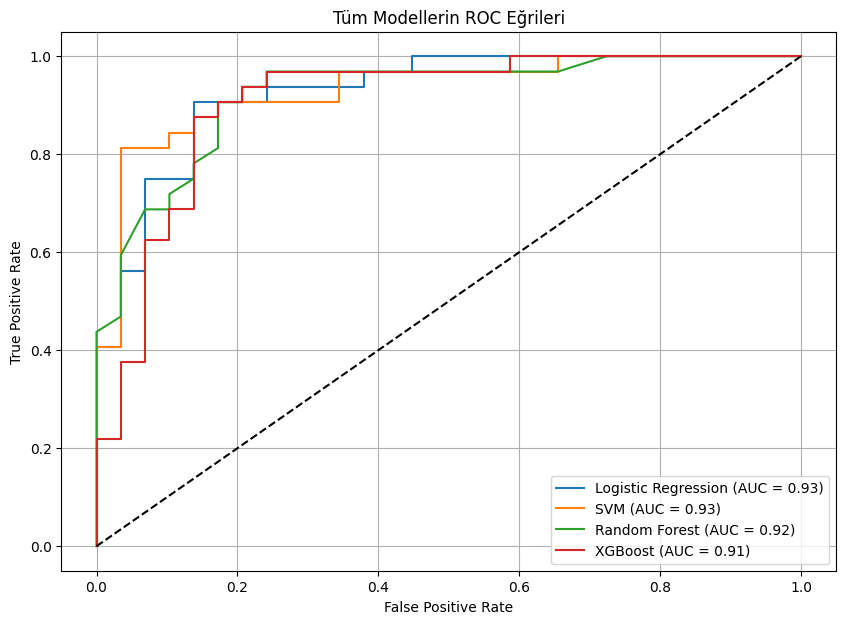

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize=(10, 7))

# Logistic Regression - yeniden eğitiyoruz
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
lr_proba = lr_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, lr_proba)
auc = roc_auc_score(y_test, lr_proba)
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc:.2f})')

# Diğer modellerin ROC eğrileri
for name, clf in models.items():
    y_proba = clf.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

# Çizim ayarları
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Tüm Modellerin ROC Eğrileri')
plt.legend()
plt.grid(True)
plt.show()
